In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [484]:
plate = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/2021.03.11_000/plate_000/'
cell = 'patch_attempt_0013_000/'
ivFile = plate+cell+'/camera_clamp1_for_kinetics_000/000/Clamp1.ma'
imgFile = plate+cell+'/camera_clamp1_for_kinetics_000/000/Camera/frames.ma'


In [485]:
ivData = h5py.File(ivFile,'r')
ivData = ivData['data'][()]
ivData.shape

(3, 80000)

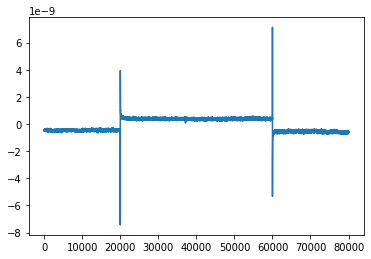

In [486]:
plt.plot(ivData[1])

In [487]:
imgData = h5py.File(imgFile,'r')
imgData = imgData['data'][()]
imgData.shape

(6085, 508, 16)

In [488]:
imgData_mean = np.mean(imgData,axis=0)

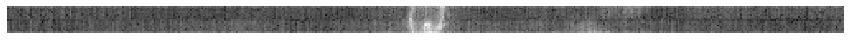

In [489]:
plt.figure(figsize=[15,10])
vmax = np.max(imgData_mean[238:270,:])
plt.imshow(np.transpose(imgData_mean),cmap='gray',vmax=vmax)
plt.axis('off')
plt.show()


In [490]:
mask = np.zeros([imgData_mean.shape[0],imgData_mean.shape[1]])

In [497]:
mask[238:270,:] = imgData_mean[238:270,:]>0.985*np.max(imgData_mean[238:270,:])

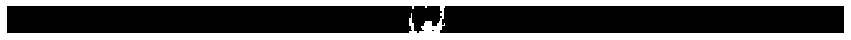

In [498]:
plt.figure(figsize=[15,10])
plt.imshow(np.transpose(mask),cmap='gray')
plt.axis('off')
plt.show()


In [499]:
F= []
for frame in range(imgData.shape[0]):
    f = np.sum(mask*imgData[frame,:,:])/np.sum(mask)
    F.append(f)


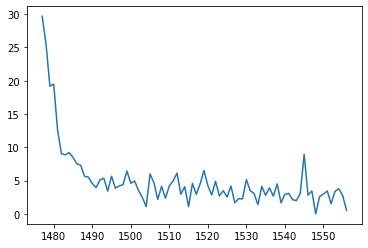

In [508]:
x = np.linspace(1,imgData.shape[0],imgData.shape[0])
# x = x/3.2
start = 1476
end = start+80
# plt.plot(x,F)
trace_to_fit = F[start:end]
trace_to_fit = trace_to_fit-np.min(trace_to_fit)
plt.plot(x[start:end],trace_to_fit)
plt.show()


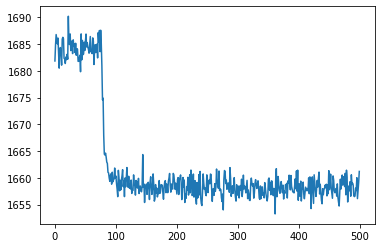

In [509]:
plt.plot(F[1400:1900])

In [510]:
def func(x, a, b, c, d, e):
    y = a * np.exp(-b * x) + c * np.exp(-d * x) + e
    return y

 

x = np.arange(1, len(trace_to_fit)+1)/3.2
popt, pcov = curve_fit(func, x, trace_to_fit)
tau_f = 1/popt[1]
tau_s = 1/popt[3]
print(tau_f,tau_s)


/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

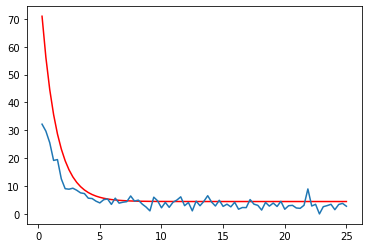

In [507]:
plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt))
plt.plot(x,trace_to_fit)

In [481]:
# asap3b_fast_on_RT = []
# asap3b_slow_on_RT = []

# asap3b_fast_on_37C = []
# asap3b_slow_on_37C = []

# asap3b_T392V_fast_on_RT = []
# asap3b_T392V_slow_on_RT = []

# asap3b_T392V_fast_on_37C = []
# asap3b_T392V_slow_on_37C = []

In [482]:
# asap3b_fast_on_RT.append(np.min([tau_f,tau_s]))
# asap3b_slow_on_RT.append(np.max([tau_f,tau_s]))

# asap3b_fast_on_37C.append(np.min([tau_f,tau_s]))
# asap3b_slow_on_37C.append(np.max([tau_f,tau_s]))

# asap3b_T392V_fast_on_RT.append(np.min([tau_f,tau_s]))
# asap3b_T392V_slow_on_RT.append(np.max([tau_f,tau_s]))

asap3b_T392V_fast_on_37C.append(np.min([tau_f,tau_s]))
asap3b_T392V_slow_on_37C.append(np.max([tau_f,tau_s]))

In [529]:
np.mean(asap3b_T392V_slow_on_37C)

5.176369930617877

In [527]:
asap3b_T392V_fast_on_RT

[1.1545444107557548, 1.3803556847686038, 0.880218263972781]